In [117]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [118]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [246]:
train_data = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test_data = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

In [120]:
test_data.head()
test_data.shape

(28000, 784)

In [247]:
train_data.head()
train_data.shape
pixel_data = train_data.iloc[:, 1:785]
number = np.array(pixel_data)
number = number.reshape(len(pixel_data), 28, 28, 1)

Text(0.5, 1.0, 'label = 1')

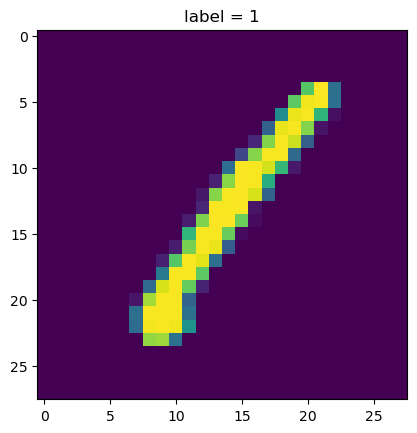

In [122]:
plt.imshow(number[0])
plt.title("label = {}".format(label[0]))

In [225]:
label = train_data['label']

In [124]:
label.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [248]:
x_train, y_train, x_target, y_target = train_test_split(number, label, test_size=0.2)


In [228]:
y_target.shape

(8400,)

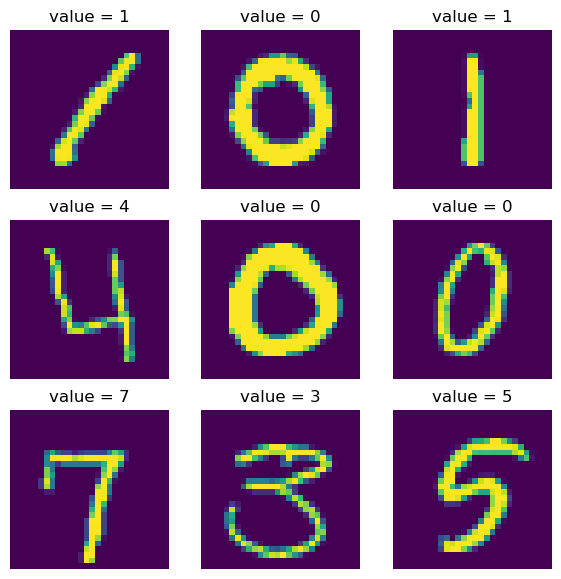

In [127]:
plt.figure(figsize=(7, 7))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(number[i])
    plt.axis('off')
    plt.title("value = {}".format(label[i]))

In [128]:
from tensorflow import keras
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.optimizers import Adam
from keras import Sequential

In [129]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(5, 5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(32, kernel_size=(5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(5, 5), padding='same', activation='relu'))
model.add(Conv2D(64, kernel_size=(5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [130]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 64)        102464    
                                                      

In [131]:
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

In [210]:
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [249]:
from tensorflow import keras
from keras.utils import to_categorical

x_target_encoding = to_categorical(x_target, num_classes=10)

In [250]:
x_target.shape

(33600,)

In [254]:
y_target_encoding = to_categorical(y_target, num_classes=10)

In [255]:
x_train_real, val_train_real, x_target_real, val_target_real = train_test_split(x_train, x_target_encoding, test_size=0.1)

In [257]:
x_target_real.shape

(30240, 10)

In [259]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(x_train_real, x_target_real, validation_data=(val_train_real, val_target_real), batch_size=86, epochs=50, verbose=2, callbacks=[early_stopping_cb])


Epoch 1/50
352/352 - 174s - loss: 0.0423 - accuracy: 0.9879 - val_loss: 0.0359 - val_accuracy: 0.9932 - 174s/epoch - 496ms/step
Epoch 2/50
352/352 - 175s - loss: 0.0368 - accuracy: 0.9895 - val_loss: 0.0243 - val_accuracy: 0.9943 - 175s/epoch - 498ms/step
Epoch 3/50
352/352 - 175s - loss: 0.0389 - accuracy: 0.9889 - val_loss: 0.0234 - val_accuracy: 0.9946 - 175s/epoch - 497ms/step
Epoch 4/50


KeyboardInterrupt: 

In [264]:
y_pred = model.predict(y_train)

263/263 [==============================] - 11s 42ms/step


In [268]:
y_predict = [np.argmax(y_pred[i]) for i in range(len(y_pred))]

In [269]:
def find_maxvalue_index(list):
    count = 0
    for i in list:
        if i != 0:
            break
        count += 1
    return count

In [270]:
li = [0,0,0,0,1,0,0]
find_maxvalue_index(li)

4

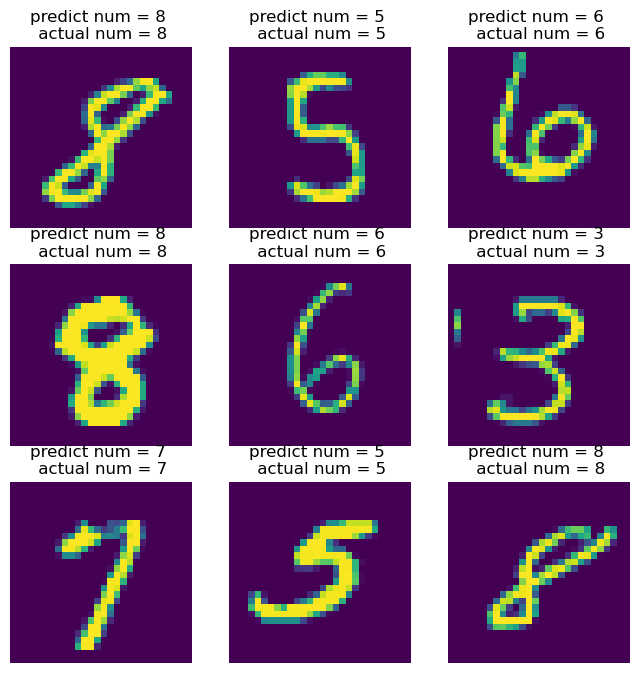

In [272]:
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(y_train[i])
    plt.axis('off')
    plt.title("predict num = {} \n actual num = {}".format(y_predict[i], find_maxvalue_index(y_target_encoding[i])))
    

In [277]:
from sklearn.metrics import accuracy_score
accuracy_score(y_target, y_predict)

0.99

In [274]:
sample_sub = pd.read_csv("/kaggle/input/digit-recognizer/sample_submission.csv")
sample_sub.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [278]:
test_data = np.array(test_data)
test_data = test_data.reshape(len(test_data),28,28,1)

result = model.predict(test_data)

predicted_val=[]
for i in range(len(result)):
    predicted_val.append(np.argmax(result[i]))

875/875 [==============================] - 36s 41ms/step


In [280]:
submission = pd.DataFrame()

imageid = []
for i in range(1, len(predicted_val)+1):
    imageid.append(i)

submission['imageid']=imageid
submission['Label']=predicted_val

In [282]:
submission.head()

,imageid,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [283]:
submission.to_csv("submission.csv", index=False)